In [1]:
from lib import utils, data_inspection_utils

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import urllib.request
import os

np.random.seed(777)

# Index Data Download Links



- [World Small Cap - IUSN](https://finance.yahoo.com/quote/IUSN.DE/history?period1=1532304000&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [Emerging Markets - EMIM.AS](https://finance.yahoo.com/quote/EMIM.AS/history?period1=1401667200&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [Developed Markets - IWDA.AS](https://finance.yahoo.com/quote/IWDA.AS/history?period1=1253836800&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [World Value - IWVL.MI](https://finance.yahoo.com/quote/IWVL.MI/history?period1=1424390400&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [REIT - TRET.AS](https://finance.yahoo.com/quote/TRET.AS/history?period1=1306972800&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)


- [EU Bond ETF - EUNA.DE](https://finance.yahoo.com/quote/EUNA.DE/history?period1=1258070400&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [Global bond ETF - IEAG.AS](https://finance.yahoo.com/quote/IEAG.AS/history?period1=1242259200&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

# Download the data

In [45]:
#### UPDATE THE DATE EVERY TIME YOU RUN IT######
date = '/10_2020/'

In [46]:
data_path = '/Users/gchouliaras/git_tree/portfolio_management/Portfolio Management/Historical_data'
#path = '/Users/Fosa/PythonProjects/git_tree/portfolio_management/Portfolio Management/Historical_data'

if not os.path.exists(data_path+date):
    os.makedirs(data_path+date)


ISUN_URL = 'https://query1.finance.yahoo.com/v7/finance/download/IUSN.DE?period1=1532304000&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
EMIM_URL = 'https://query1.finance.yahoo.com/v7/finance/download/EMIM.AS?period1=1401667200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
IWDA_URL = 'https://query1.finance.yahoo.com/v7/finance/download/IWDA.AS?period1=1253836800&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
IWVL_URL = 'https://query1.finance.yahoo.com/v7/finance/download/IWVL.MI?period1=1424390400&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
TRET_URL ='https://query1.finance.yahoo.com/v7/finance/download/TRET.AS?period1=1306972800&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
EUNA_URL = 'https://query1.finance.yahoo.com/v7/finance/download/EUNA.DE?period1=1258070400&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
IEAG_URL = 'https://query1.finance.yahoo.com/v7/finance/download/IEAG.AS?period1=1242259200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'

urllib.request.urlretrieve(ISUN_URL, data_path+date+'IUSN.csv');
urllib.request.urlretrieve(IWDA_URL, data_path+date+'IWDA.csv');
urllib.request.urlretrieve(EMIM_URL, data_path+date+'EMIM.csv');
urllib.request.urlretrieve(IWVL_URL, data_path+date+'IWVL.csv');
urllib.request.urlretrieve(TRET_URL, data_path+date+'TRET.csv');
urllib.request.urlretrieve(EUNA_URL, data_path+date+'EUNA.csv');
urllib.request.urlretrieve(IEAG_URL, data_path+date+'IEAG.csv');



# Construct a portfolio

In [41]:
path = '/Users/gchouliaras/git_tree/portfolio_management/Portfolio Management/Historical_data'

# Load dataframes
EMIM = pd.read_csv(f'{path}/EMIM.AS.csv')
EUNA = pd.read_csv(f'{path}/EUNA.csv')
IEAG = pd.read_csv(f'{path}/IEAG.AS.csv')
IWDA = pd.read_csv(f'{path}/IWDA.AS.csv')
IUSN = pd.read_csv(f'{path}/IUSN.csv')
IWVL = pd.read_csv(f'{path}/IWVL.csv')
TRET = pd.read_csv(f'{path}/TRET.csv')

In [44]:
# Load auto-saved dataframes
## FIX THE URLS ! SOME INDICES DO NOT HAVE CORRECT DATA! 


#  EMIM = pd.read_csv(f'{data_path+date}/EMIM.csv')
#  EUNA = pd.read_csv(f'{data_path+date}/EUNA.csv')
#  IEAG = pd.read_csv(f'{data_path+date}/IEAG.csv')
#  IWDA = pd.read_csv(f'{data_path+date}/IWDA.csv')
#  IUSN = pd.read_csv(f'{data_path+date}/IUSN.csv')
#  IWVL = pd.read_csv(f'{data_path+date}/IWVL.csv')
#  TRET = pd.read_csv(f'{data_path+date}/TRET.csv')


In [42]:
# Construct portfolio

portfolio = [IWDA, EMIM, IWVL, IUSN, TRET, EUNA, IEAG]
names = ['IWDA', 'EMIM', 'IWVL', 'IUSN', 'TRET', 'EUNA', 'IEAG']
description = ['Developed Markets', 'Emerging Markets', 'World Small Cap', 'World Value', 'REIT', 'EU bond ETF', 'Global bond ETF']
weights = [0.36, 0.12, 0.12, 0.12, 0.08, 0.1, 0.1]

# Add absolute and percentage change, and set Date to Datetime
portfolio = utils.apply_perc_change(portfolio)

# Construt dictionary of the portfolio
portfolio_dict = utils.construct_portfolio_dictionary(portfolio, names, weights, description)

# Inspect the data

############### Printing Number of Rows per index...###############
Number of days in "IWDA" is 2736
Number of days in "EMIM" is 1550
Number of days in "IWVL" is 1301
Number of days in "IUSN" is 544
Number of days in "TRET" is 2350
Number of days in "EUNA" is 634
Number of days in "IEAG" is 2844


############### Printing Data Ranges per index...###############
Date range for "IWDA" is from 2009-10-13 00:00:00 to 2020-06-24 00:00:00
Date range for "EMIM" is from 2014-06-02 00:00:00 to 2020-06-24 00:00:00
Date range for "IWVL" is from 2015-02-17 00:00:00 to 2020-06-25 00:00:00
Date range for "IUSN" is from 2018-04-26 00:00:00 to 2020-06-25 00:00:00
Date range for "TRET" is from 2011-04-15 00:00:00 to 2020-06-26 00:00:00
Date range for "EUNA" is from 2017-12-15 00:00:00 to 2020-06-26 00:00:00
Date range for "IEAG" is from 2009-05-14 00:00:00 to 2020-06-24 00:00:00




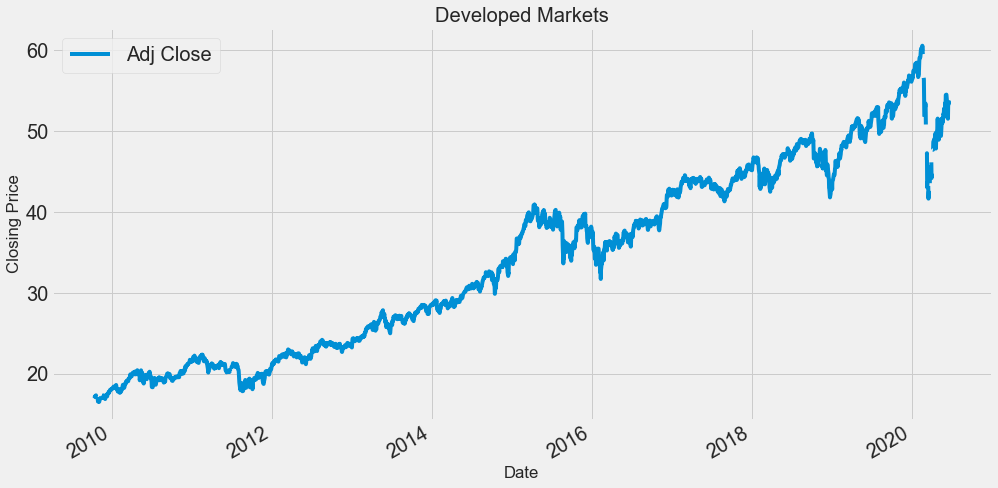

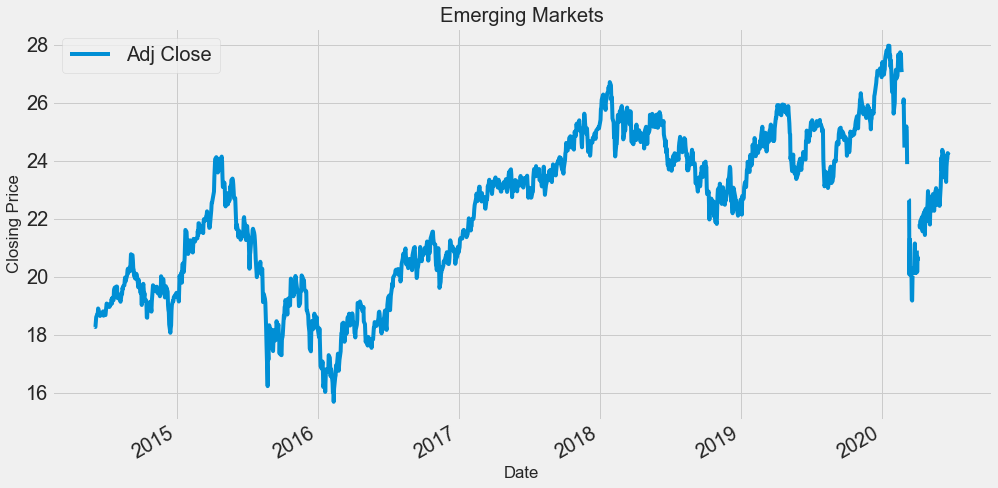

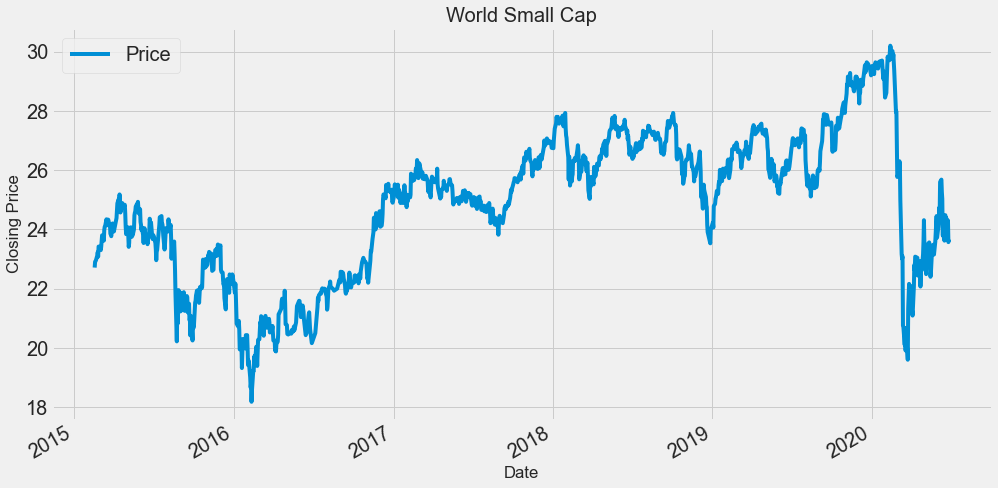

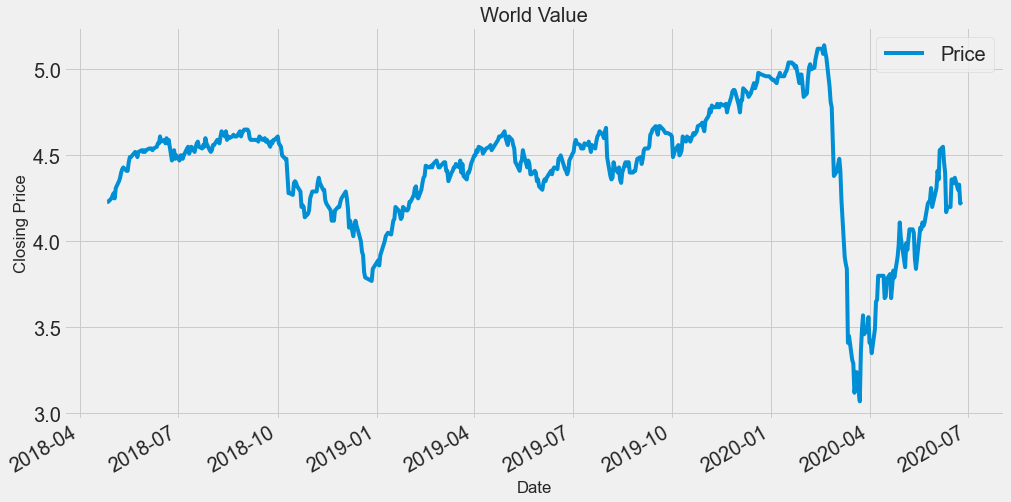

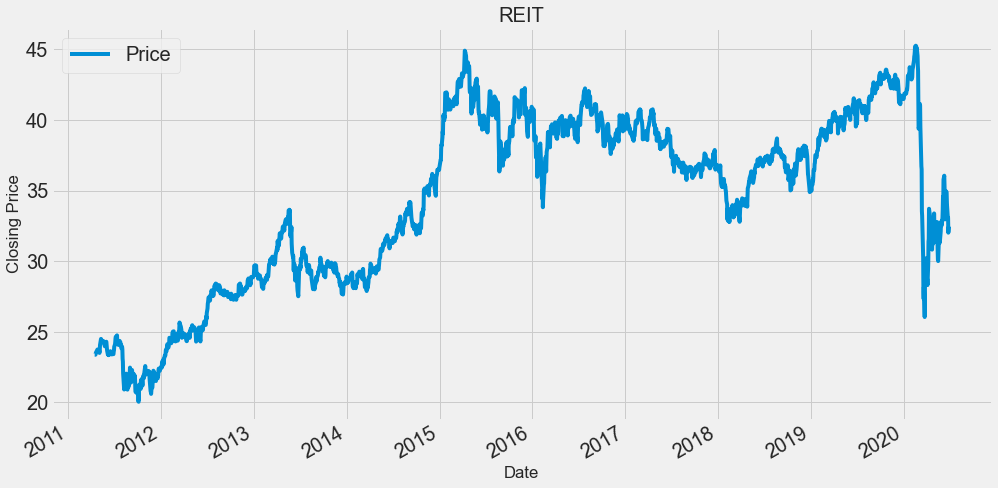

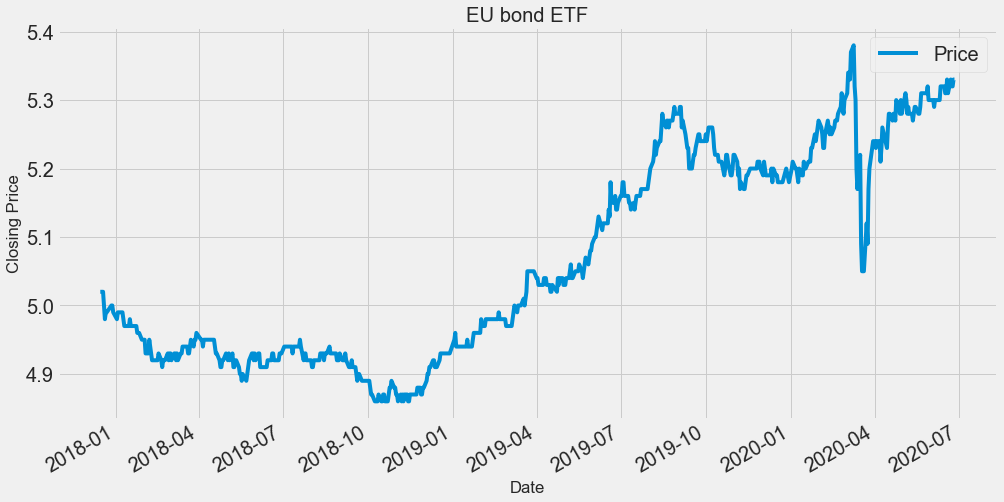

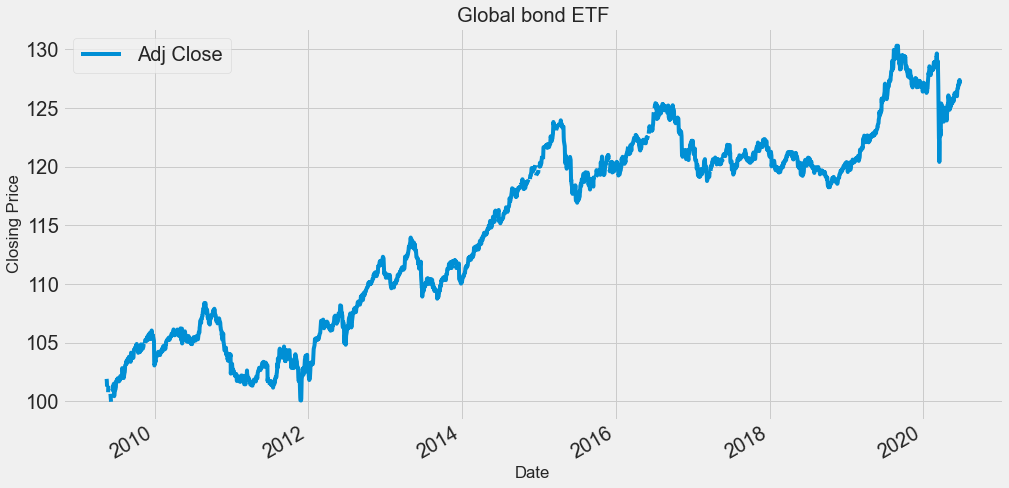

In [43]:
data_inspection_utils.inspect_data(portfolio_dict=portfolio_dict)

## Compute risk and return of the portfolio

In [6]:
data_inspection_utils.print_risk_and_return_portfolio(portfolio_dict)

The annualized return of the portfolio is 6.16% and the risk is 11.23%


The portfolio minimum date is 2018-04-26 and maximum date is 2020-06-24


# Correlation and Covariance Matrix

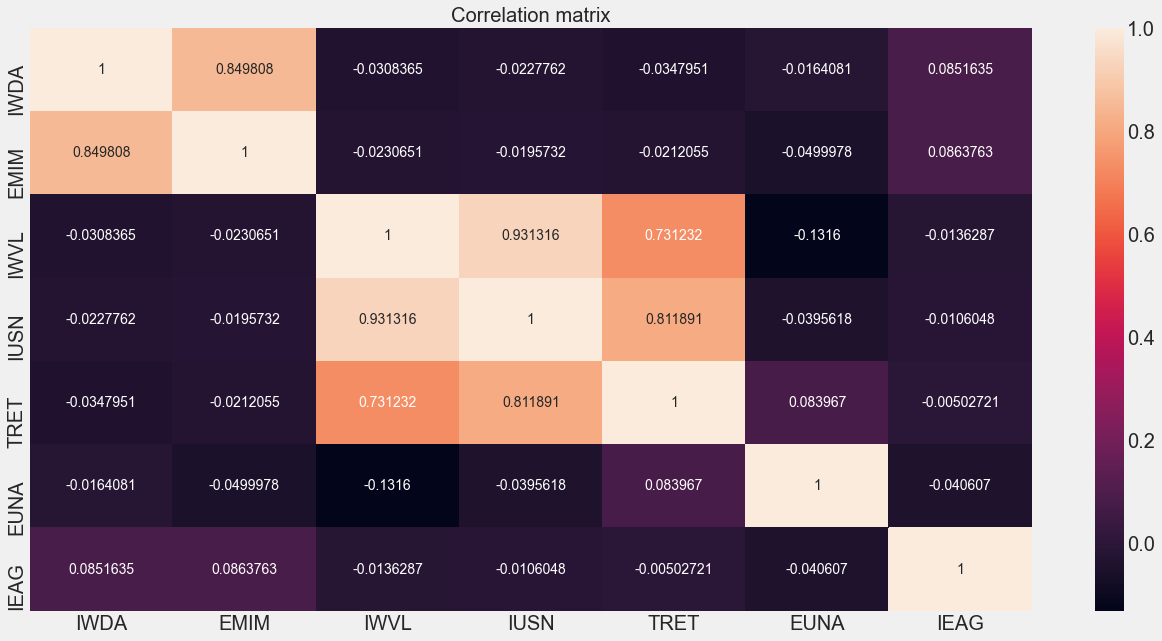

In [7]:
data_inspection_utils.plot_correlation_matrix(portfolio_dict['frames'], portfolio_dict['names'])

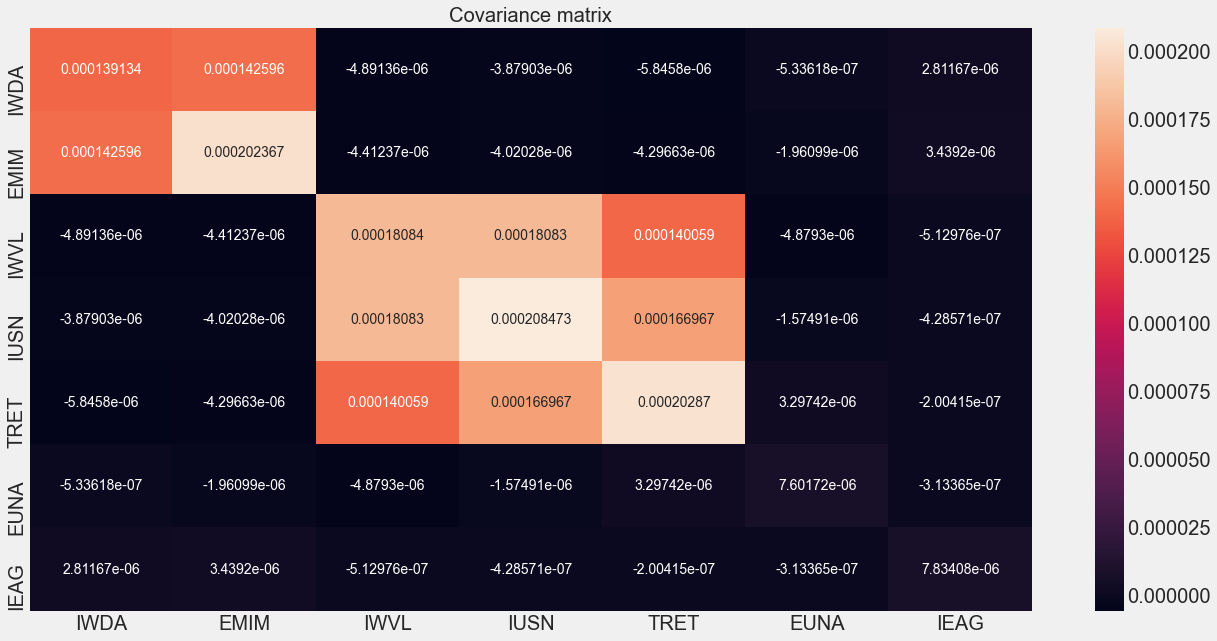

In [8]:
data_inspection_utils.plot_covariance_matrix(portfolio_dict['frames'], portfolio_dict['names'])